<img src='../frameworks/img/EU-Copernicus-EUM-WEKEO_banner_logo.png' align='right' width='75%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb"><< OLCI file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_OLCI_bands_RGB.ipynb">OLCI bands and RGB imagery >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://trainhub.eumetsat.int/ocean/sensors/1_3_OLCI_coverage.ipynb"><img src="https://img.shields.io/badge/Launch-TrainHub-Blue.svg" alt="Open in TrainHub"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://mybinder.org/v2/gl/eumetlab%2Focean%2Fsensors%2Flearn-olci/main?labpath=1_OLCI_introductory/1_3_OLCI_coverage.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://colab.research.google.com/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_3_OLCI_coverage.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://studiolab.sagemaker.aws/import/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_3_OLCI_coverage.ipynb"><img src="https://studiolab.sagemaker.aws/studiolab.svg" alt="Open In Studio Lab"/></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/eumetlab/ocean/sensors/learn-olci&urlpath=1_OLCI_introductory/1_3_OLCI_coverage.ipynb&branch=main"><img src="https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft" alt="Open in Planetary Computer"/></a></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **[1_1_OLCI_data_access.ipynb](1_1_OLCI_data_access.ipynb)** (this will download the required OLCI products for this notebook)

</div>
<hr>

# 1.3 Determining OLCI product coverage

### Data used

| Product Description  | Data Store collection ID|  WEkEO HDA ID | Product Navigator |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| Sentinel-3 OLCI level-2 full resolution  | EO:EUM:DAT:0407 | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced) 
| Sentinel-3 OLCI level-2 reduced resolution | EO:EUM:DAT:0408 | WEkEO: EO:EUM:DAT:SENTINEL-3:OL_2_WRR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WRR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced) 

### Learning outcomes

At the end of this notebook you will know;
* Objective

### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Investigating OLCI coverage](#section1)

<hr>

In [1]:
# library imports
import cartopy
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Polygon
import warnings
import xml.etree.ElementTree as ET

warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Investigating OLCI coverage
[Back to top](#TOC_TOP)

</div>

In [2]:
# selecting SAFE directories
SAFE_directories = [
    os.path.join(os.getcwd(), 'products',
    'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3'),
    os.path.join(os.getcwd(), 'products',
    'S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3')
    ]

In [3]:
# selecting SAFE manifest
SAFE_manifests = []
for SAFE_directory in SAFE_directories:
    SAFE_manifests.append(glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0])

In [4]:
polygons = []
tags = []
for SAFE_manifest in SAFE_manifests:
    tags.append(SAFE_manifest.split('/')[-2])
    tree = ET.parse(SAFE_manifest)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':"http://www.opengis.net/gml"})
    polygons.append((polygon[0].text))

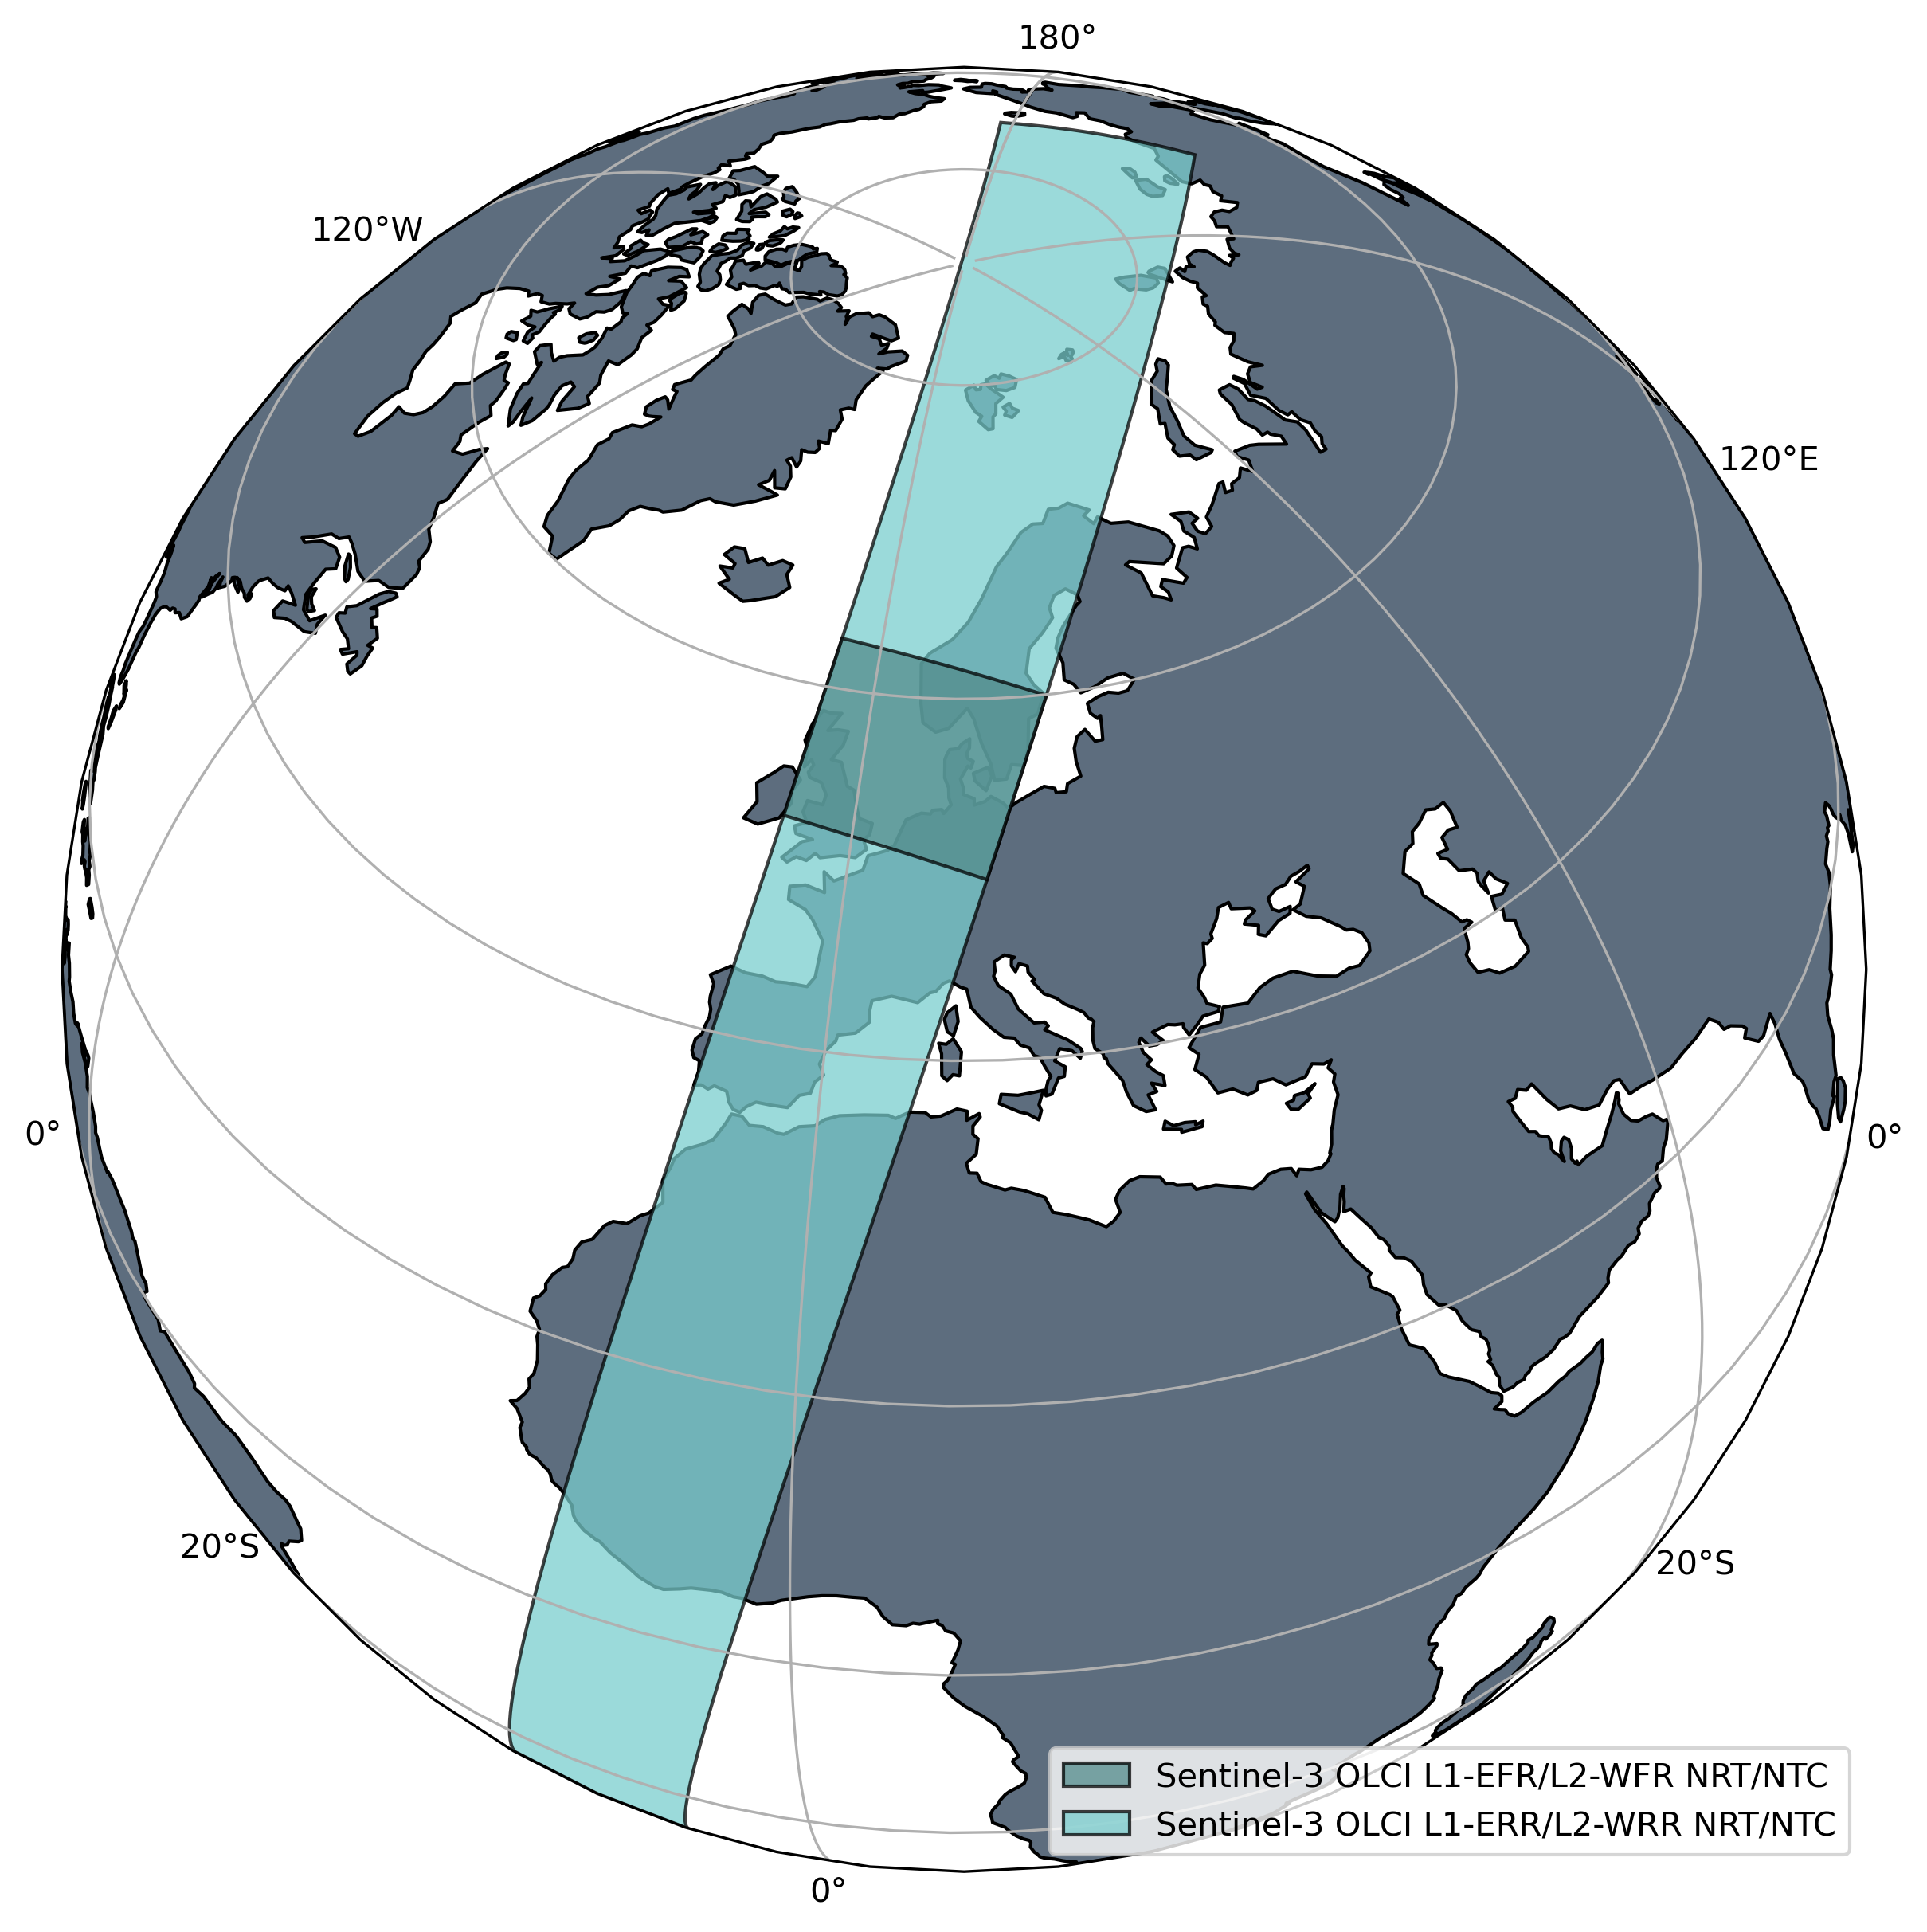

In [6]:
fig1 = plt.figure(figsize=(10, 10), dpi=300)

m = plt.axes(projection=cartopy.crs.NearsidePerspective(central_longitude=10.0, central_latitude=45.0))
m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
m.set_global()

gl = m.gridlines(draw_labels = True)

colours = ['#528B8B', '#79CDCD']
zorders = [2, 1]
labels = ['Sentinel-3 OLCI L1-EFR/L2-WFR NRT/NTC', 'Sentinel-3 OLCI L1-ERR/L2-WRR NRT/NTC']

plots = []
for polygon, tag, colour, zorder, SAFE_manifest in zip(polygons, tags, colours, zorders, SAFE_manifests):
    coords = np.asarray(polygon.split(' ')).astype('float')
    polygon_geom = Polygon(zip((coords[1::2]), coords[0::2]))
    x, y = polygon_geom.exterior.xy
    p, = plt.fill(x, y, alpha=0.74, fc=colour, ec='k', transform=cartopy.crs.Geodetic(), zorder=zorder)
    plots.append(p)

plt.legend(plots, labels, loc='lower right')
plt.savefig('1_3_OLCI_coverage.png', bbox_inches='tight')

<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>